# Chapter 2 – End-to-end Machine Learning project

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get the Data

In [2]:
# Put your own path to the data.
housing = pd.read_csv(r'C:\Users\Antonio Prgomet\Documents\ec_utbildning\kursframställning\sthlm_gbg\ml_sthlm_gbg\datasets\housing\housing.csv')

## Inspecting the data structure

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Note, missing values for total_bedrooms. Ocean_proximity is an object. 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

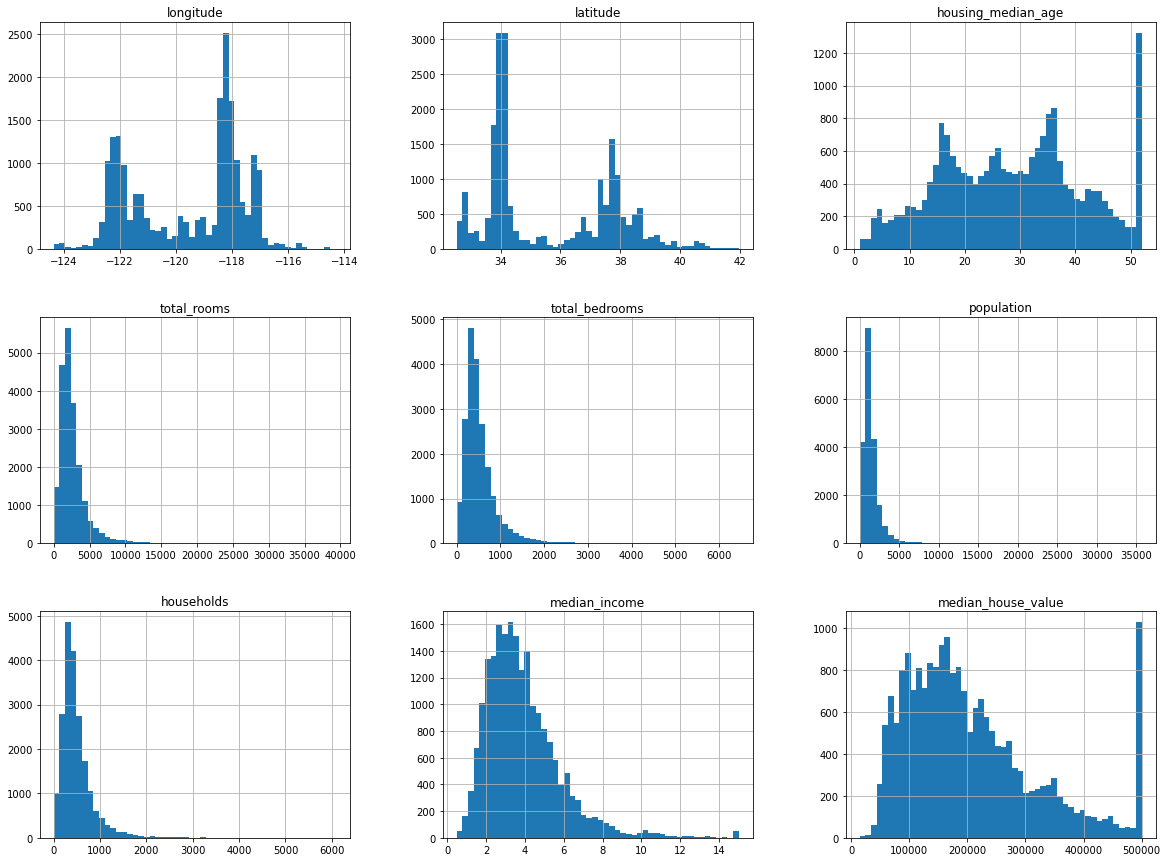

In [7]:
housing.hist(bins=50, figsize=(20,15))

## Create a Test Set

In [8]:
# To make reproducible results. 
np.random.seed(42)

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [10]:
# Sanity check. 
print(len(train_set))
print(len(test_set))
print(len(test_set) + len(train_set))

16512
4128
20640


<AxesSubplot:>

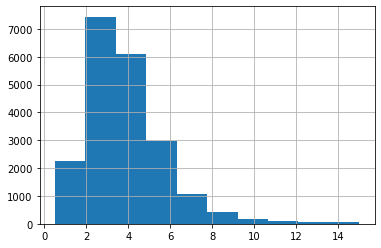

In [11]:
# Inspecting the median income distribution and below we also create different categories. 
housing["median_income"].hist()

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [13]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

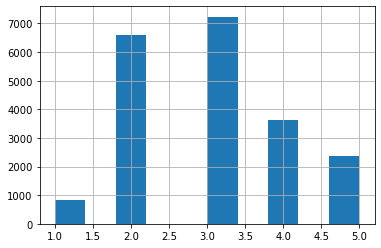

In [14]:
housing["income_cat"].hist()

## Small demonstration of Stratified Sampling, will bot be used in the script below. 


(p.53) Population divided into homogenous subgroups called strata, and the "right" number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population. 

In [15]:
# If needed, read about StratifiedShuffleSplit here: https://www.geeksforgeeks.org/sklearn-stratifiedshufflesplit-function-in-python/ 
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
# We see that the proportion in our test set is the same as in the overall population. 
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [17]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [18]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

In [19]:
# We see that we get very similar proportions.
compare_props

,Overall,Stratified,Random
1,0.039826,0.039971,0.040213
2,0.318847,0.318798,0.324370
3,0.350581,0.350533,0.358527
4,0.176308,0.176357,0.167393
5,0.114438,0.114341,0.109496


# Visualize the Data to Gain Insights

In [20]:
# We only explore the training set. We create a copy so we don't mess up the original data. 
housing = train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

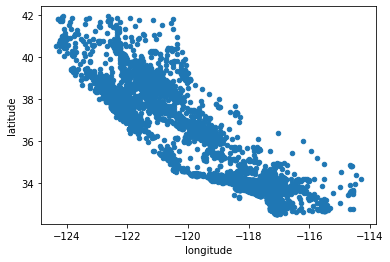

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

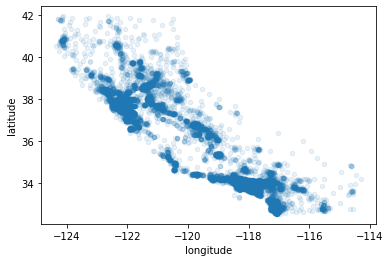

In [22]:
# To better see the "density", we use transparent points. 
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [23]:
# To see a really cool plot, check out Agerons notebook. 

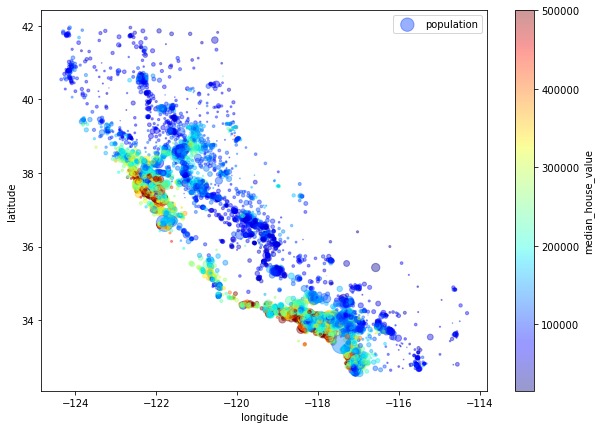

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

## Looking for Correlations

In [25]:
corr_matrix = housing.corr()

In [26]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

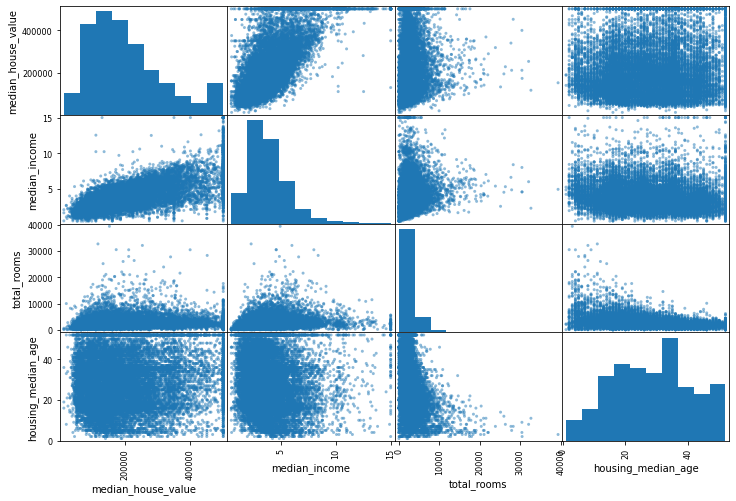

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

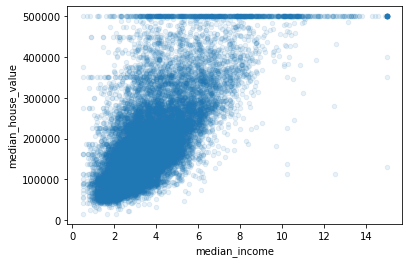

In [29]:
# We see a "horizontal line" at 500000. This is due to observations above that value have been "set" to 500000. 
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

## Feature Engineering: Experimenting with Attribute Combinations

In [30]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,3
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,3
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,3
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,2
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,3


In [31]:
# Creating 3 new features. 
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [32]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,3,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,3,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,3,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,2,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,3,6.268421,0.180940,2.300000


In [33]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

In [34]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738,5.435235,0.212858,3.096961
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448,2.387375,0.057995,11.578744
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.888889,0.100000,0.692308
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000,4.452055,0.175178,2.428799
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000,5.235874,0.202808,2.817240
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000,6.061037,0.239501,3.280000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Prepare the Data for Machine Learning Algorithms

In [35]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,3,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,3,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,3,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,2,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,3,6.268421,0.180940,2.300000


In supervised regression problems we can assume the data is generated by a process of the following functional form: 

$y = \alpha + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + e$ 

where $e$ is some random error which can be normal distributed for instance. 

If this is the case, we can try to find a model of the form $y = \alpha + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$ to make predictions (but there are many other modelling alternatives that we will cover in the course). 

In the code below, we have y which is called "housing_labels" and the features / independent variables (x) are called "housing".

In [36]:
# In general we have a dependend variable y (called housing below), 
# and independent variable(s) x (called housing labels below) giving the functional form: y = a + bx + e
# where e is some random error. 

housing = train_set.drop("median_house_value", axis=1)  # Drop labels for "X" training set.
housing_labels = train_set["median_house_value"].copy()

In [37]:
housing_labels.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16512 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


## Data Cleaning (see p.63 in the book)

In the book 3 potential options are listed:

```python
housing.dropna(subset=["total_bedrooms"])    # option 1, drop rows.
housing.drop("total_bedrooms", axis=1)       # option 2, drop columns. 
median = housing["total_bedrooms"].median()  # option 3, fill with median value. 
housing["total_bedrooms"].fillna(median, inplace=True)
```


We will use SimpleImputer from scikit-learn to do option 3. 


In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [40]:
# Remove the text attribute because median can only be calculated on numerical attributes:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [41]:
# A sanity check where we see that the statistics_attribute simply contains the median values for each column. 
print(imputer.statistics_)
print()

print('sanity check:')
print(housing_num.median().values)

[-118.51     34.26     29.     2129.      437.     1167.      410.
    3.5458    3.    ]

sanity check:
[-118.51     34.26     29.     2129.      437.     1167.      410.
    3.5458]


C:\Users\Antonio Prgomet\AppData\Local\Temp\ipykernel_13380\436509165.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(housing_num.median().values)


In [42]:
# Transforming the training set (i.e. adding the median value for each column where observations are missing). 
X = imputer.transform(housing_num)
X

array([[-117.03  ,   32.71  ,   33.    , ...,  623.    ,    3.2596,
           3.    ],
       [-118.16  ,   33.77  ,   49.    , ...,  756.    ,    3.8125,
           3.    ],
       [-120.48  ,   34.66  ,    4.    , ...,  336.    ,    4.1563,
           3.    ],
       ...,
       [-118.38  ,   34.03  ,   36.    , ...,  527.    ,    2.9344,
           2.    ],
       [-121.96  ,   37.58  ,   15.    , ...,  559.    ,    5.7192,
           4.    ],
       [-122.42  ,   37.77  ,   52.    , ..., 1242.    ,    2.5755,
           2.    ]])

In [43]:
print(type(X))
# Transform back to dataframe. 
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
housing_tr

<class 'numpy.ndarray'>


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,3.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,3.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,3.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,2.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,3.0
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,5.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,3.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,2.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,4.0


## Handling Text and Categorical Attributes

In [44]:
# Using a single bracket will output a Pandas Series, while a double bracket will output a Pandas DataFrame.
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
17848,<1H OCEAN
6252,<1H OCEAN
9389,NEAR BAY
6113,<1H OCEAN
6061,<1H OCEAN


In [45]:
# The OneHodEncoder creates a binary column for each category in a categorical feature. 
# It returns a sparse matrix. 
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [46]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [47]:
# In a sparse matrix most of the elements are zero, and for efficiency reasons only the posisitions
# of the non-zero elements are stored as demonstrated in code below. 
print(housing_cat_1hot)

  (0, 4)	1.0
  (1, 4)	1.0
  (2, 4)	1.0
  (3, 4)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 3)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 3)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 1)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 1)	1.0
  (16490, 4)	1.0
  (16491, 1)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 1)	1.0
  (16495, 0)	1.0
  (16496, 0)	1.0
  (16497, 1)	1.0
  (16498, 3)	1.0
  (16499, 3)	1.0
  (16500, 0)	1.0
  (16501, 3)	1.0
  (16502, 0)	1.0
  (16503, 4)	1.0
  (16504, 0)	1.0
  (16505, 4)	1.0
  (16506, 0)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 0)	1.0
  (16510, 0)	1.0
  (16511, 3)	1.0


In [48]:
# In sanity check below, wee see the categories and the observations.
# Ex. First observation is NEAR OCEAN --> [0 0 0 0 1]

In [49]:
housing_cat.head()

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND


In [50]:
print(housing_cat_1hot.toarray())
print()

print('Sanity check, rows should sum to 1.')
print(np.sum(housing_cat_1hot, axis = 1))

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]

Sanity check, rows should sum to 1.
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


## Transformation Pipelines

In [51]:
# A custom transformer from geron, not part of the course so you can skip this. 
# Included here since it is used later down in the code. (p. 68)
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [52]:
# Pipeline for the numerical columns. 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [53]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

# En beskrivning av Root Mean Squared Error (RMSE)
RMSE måttet kommer användas i hela kursen och även nedan.


### Vad är RMSE?

RMSE står för Root Mean Squared Error.\
Det är ett mått för att utvärdera regressionsproblem och mäter prediktionernas medelavstånd från de äkta, observerade värdena.

Matematiska formeln för RMSE är:

$RMSE = \sqrt{\frac{1} {n} \sum_{i=1}^{n}(\hat{y}_i-y_i)^2}$

Idén bakom RMSE är simpel:
- Man tar skillnaden mellan en prediktion och respektive observerad värde: $\hat{y}_i-y_i$;    Det kallas för __Error__.
- Vi bryr oss inte om det är en positiv eller negativ skillnad, därför kvadrerar vi: $(\hat{y}_i-y_i)^2$;   Det kallas för __Squared Error__.
- Vi räknar ut medelvärdet för Squared Error: $\frac{1} {n} \sum_{i=1}^{n}(\hat{y}_i-y_i)^2$;    Det kallas för __Mean Squared Error__.
- Vi tar roten ur Mean Squared Error, så måttet är på det samma skala som datan och därför lättare att tolka: $\sqrt{\frac{1} {n} \sum_{i=1}^{n}(\hat{y}_i-y_i)^2}$

## Visualisering av RMSE

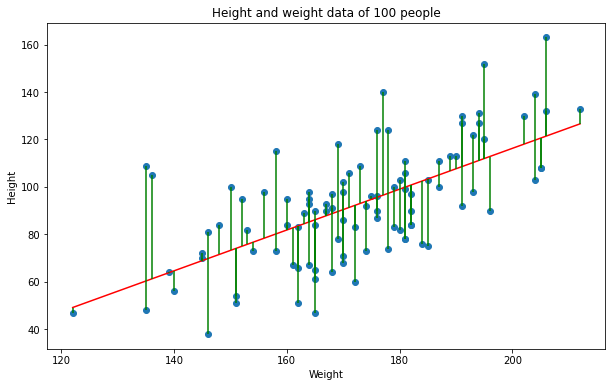

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
np.random.seed(42)
from sklearn.linear_model import LinearRegression

height = np.random.normal(loc=175, scale=20, size=100).astype('int')
weight = height - 100 + np.random.normal(loc=20, scale=20, size=100).astype('int')
lr = LinearRegression()
lr.fit(height.reshape(-1,1), weight)

fig = plt.figure(figsize=(10,6))
X_min = height.min()
X_max = height.max()
y_min = lr.predict(np.array(height.min()).reshape(-1,1))
y_max = lr.predict(np.array(height.max()).reshape(-1,1))

y_predline = lr.predict(height.reshape(-1,1))

plt.scatter(height, weight)
plt.plot([X_min, X_max], [y_min, y_max], color='r')
plt.vlines(height, weight, y_predline, color='g')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height and weight data of 100 people')
plt.show()

# Select and Train a Model

## Training and Evaluating on the Training Set

Creating a Linear Regression modell. 

In [55]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [56]:
# let's try the full preprocessing pipeline on a few training instances and comparing with actual values. 
# This gives a good intuition on what is happening. 
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print()

print("Labels:", list(some_labels))
print()

Predictions: [185873.6891356  292091.71095342 238246.24693763 146331.45344945
 166758.93318378]

Labels: [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]



In [57]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared = False)
lin_rmse

67229.89334460018

Creating an Decision Tree. 

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [59]:
# Get RMSE = 0? Either our model is basically perfect or something is wrong?
# Reason: Evaluating the error on data that we trained our model on is wrong to do. 
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation
Based on the crossvalidation (CV) below, we get the following ranking in model performance: 
(1) Random Forest
(2) Linear Regression 
(3) Decision Trees

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
# Creating a function for conveniance and hence avoiding to repeat code. . 
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [62]:
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [66036.21367022 70468.87776244 67833.86246882 69200.17304197
 74194.98789672 67034.00473699 67698.11238601 68956.99747982
 69105.65349992 70686.35055121]
Mean: 69121.52334941112
Standard deviation: 2181.7111649915114


In [63]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [64514.30222069 71073.98477427 66174.9936147  65905.58855089
 68184.46344749 64908.03786758 65002.06410174 67944.17969809
 72090.0088189  68870.7291606 ]
Mean: 67466.83522549525
Standard deviation: 2500.9071517299503


In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [65]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18539.309520849132

In [66]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [47296.81630361 51507.06665722 49286.29320277 51563.63596533
 52828.72446134 47006.45471025 47413.1400967  50731.25289864
 49272.27650529 50250.61301011]
Mean: 49715.62738112522
Standard deviation: 1910.6561117369336


# Fine-Tune Your Model

## Grid Search

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [69]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [70]:
grid_search.best_score_

-2558529566.069144

In [71]:
analysis = pd.DataFrame(grid_search.cv_results_)
analysis[["params", "rank_test_score", "mean_train_score"]].head()
# analysis[["params", "rank_test_score", "mean_train_score"]]

,params,rank_test_score,mean_train_score
0,"{'max_features': 2, 'n_estimators': 3}",18,-1.086501e+09
1,"{'max_features': 2, 'n_estimators': 10}",11,-5.804322e+08
2,"{'max_features': 2, 'n_estimators': 30}",5,-4.354898e+08
3,"{'max_features': 4, 'n_estimators': 3}",15,-9.788471e+08
4,"{'max_features': 4, 'n_estimators': 10}",9,-5.384411e+08


## Randomized Search 
Skip this unless interested. 

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001724052B8E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001724053DEB0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [73]:
analysis_rs = pd.DataFrame(rnd_search.cv_results_)
analysis_rs
analysis_rs[["params", "rank_test_score", "mean_test_score"]].head()
# analysis_rs[["params", "rank_test_score", "mean_test_score"]]

,params,rank_test_score,mean_test_score
0,"{'max_features': 7, 'n_estimators': 180}",1,-2.476231e+09
1,"{'max_features': 5, 'n_estimators': 15}",9,-2.658810e+09
2,"{'max_features': 3, 'n_estimators': 72}",7,-2.588746e+09
3,"{'max_features': 5, 'n_estimators': 21}",8,-2.613095e+09
4,"{'max_features': 7, 'n_estimators': 122}",2,-2.479304e+09


## Evaluate Your System on the Test Set

In [74]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)  # Note, no fitting, only transforming!
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [75]:
final_rmse

50113.360695351395

We can compute a 95% confidence interval for the test RMSE:

In [76]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([47921.63329158, 52213.16790842])

# Extra material

## A full pipeline with both preparation and prediction

In [77]:
# full_pipeline is the column transformer above. 

full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([185873.6891356 , 292091.71095342, 238246.24693763, 146331.45344945,
       166758.93318378])